In [60]:
#Importar las librerías por utilizar
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import skimage
from skimage import io
from skimage.filters import threshold_otsu,sobel,sobel_v,sobel_h
from skimage.transform import resize

#Obtener la direccion de las imagenes
path = os.getcwd()

Deteccion de cromatico o no cromatico

[255 255 255 255]


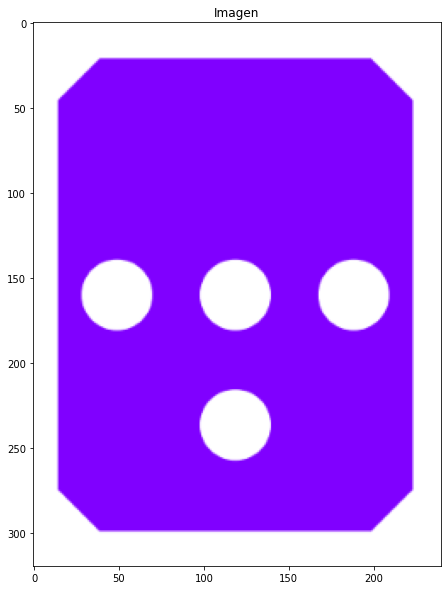

In [3]:
imagen= io.imread(path +r'\Morada3.png')

plt.figure(figsize=(15,10))
plt.imshow(imagen)
plt.title("Imagen")
print(imagen[1][1])
plt.show()

[255 255 255]


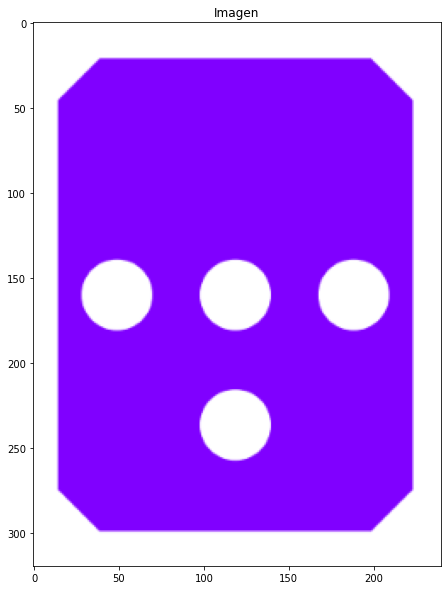

In [4]:
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape
    if ch == 3:
        return rgba
    assert ch == 4, 'RGBA image has 4 channels.'
    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    a = np.asarray( a, dtype='float32' ) / 255.0
    R, G, B = background
    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B
    return np.asarray( rgb, dtype='uint8' )

imagen_argb= io.imread(path +r'\Morada3.png')
imagen_rgb= rgba2rgb(imagen_argb)
plt.figure(figsize=(15,10))
plt.imshow(imagen_rgb)
plt.title("Imagen")
print(imagen_rgb[1][1])
plt.show()

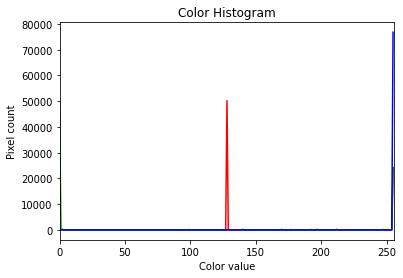

In [5]:
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        imagen_rgb[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()

In [6]:
def is_cromatic_v1(image):
    rows=len(image)
    print(rows)
    columns=len(image[1])
    print(columns)
    pxl_sum = rows*columns
    print(pxl_sum)
    not_greyscale = 0
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            if r != g !=b:
                not_greyscale+= 1
    print(f'Pixeles cromaticos: {not_greyscale}')
    print(0.6*pxl_sum)
    if not_greyscale >= 0.6*pxl_sum:
        return True
    else:
        return False

In [7]:
is_cromatic_v1(imagen_rgb)

320
240
76800
Pixeles cromaticos: 52603
46080.0


True

La segunda funcion calcula cuantos pixeles cromaticos, blancos y totales hay en la imagen, luego calcula la cantidad de pixles no blancos, es decir pertenecen al objeto o a la sombra, y compara un porcentaje de estos que equivalga a los pixeles que si son del objeto y los compara con la cantidad de pixeles no cromaticos, en donde si hay mas pixeles cromaticos entonces el objeto es cromatico. Asumiendo que un 90% de lo pixeles no blancos pertenecen al objeto.

In [8]:
def is_cromatic_v2(image):
    rows=len(image)
    print(rows)
    columns=len(image[1])
    print(columns)
    pxl_sum = rows*columns
    print(pxl_sum)
    not_greyscale = 0
    white = 0
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            if r != g !=b:
                not_greyscale+= 1
            elif r == g == b == 255:
                white+= 1
    obj_pxl = pxl_sum - white
    print(f'Pixeles cromaticos: {not_greyscale}')
    print(f'Pixeles del objeto: {obj_pxl}')
    if not_greyscale >= 0.9*obj_pxl:
        return True
    else:
        return False

In [9]:
grey_argb= io.imread(path +r'\Gris3.png')
grey_rgb= rgba2rgb(grey_argb)
is_cromatic_v1(grey_rgb)

320
240
76800
Pixeles cromaticos: 0
46080.0


False

In [10]:
is_cromatic_v2(imagen_rgb)

320
240
76800
Pixeles cromaticos: 52603
Pixeles del objeto: 52624


True

Hay un problema, las fotos capturadas con el celular no capturan el blanco como blanco, sino como amarillo por lo que los detecta como si fuera de color

In [11]:
def is_cromatic_v3(image):
    rows=len(image)
    columns=len(image[1])
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            if r != g !=b:
                return True

In [12]:
fotosinobj_argb= io.imread(path +r'\IMG_AZUL_SINOBJ.jpeg')
fotosinobj_rgb= rgba2rgb(fotosinobj_argb)
is_cromatic_v3(fotosinobj_rgb)

True

In [13]:
def is_white(image):
    rows=len(image)
    columns=len(image[1])
    whites = 0
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            if r == g == b == 255:
                whites+= 1
    return whites

Se confirma con la funcion que cuenta blancos, en efecto no hay pixeles blancos en la imagen, se requiere segmentacion

In [14]:
is_white(fotosinobj_rgb)

0

Esta funcion 

In [15]:
def is_cromatic_v4(image):
    rows=len(image)
    columns=len(image[1])
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            desvest = np.std([r,g,b])
            if desvest <= 10:
                image[row][column][0] = 255
                image[row][column][1] = 255
                image[row][column][2] = 255
    return image

[255 255 255]


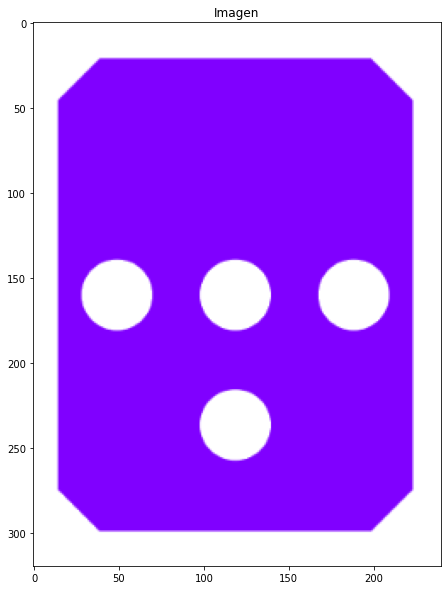

In [16]:
imagen_argb= io.imread(path +r'\Morada3.png')
imagen_rgb= rgba2rgb(imagen_argb)
image = is_cromatic_v4(imagen_rgb)
plt.figure(figsize=(15,10))
plt.imshow(image)
plt.title("Imagen")
print(imagen_rgb[1][1])
plt.show()

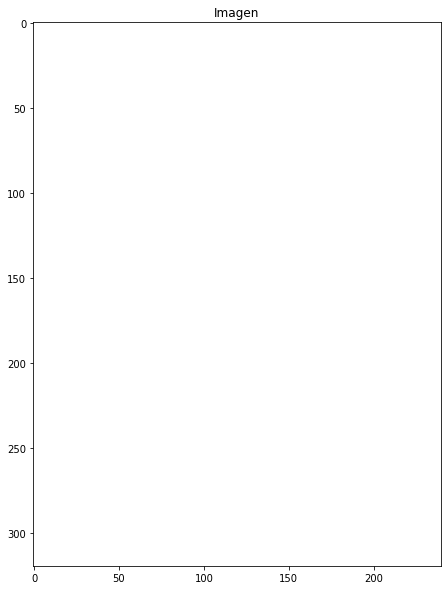

In [17]:
image = is_cromatic_v4(grey_rgb)
plt.figure(figsize=(15,10))
plt.imshow(image)
plt.title("Imagen")
plt.show()

[255 255 255]


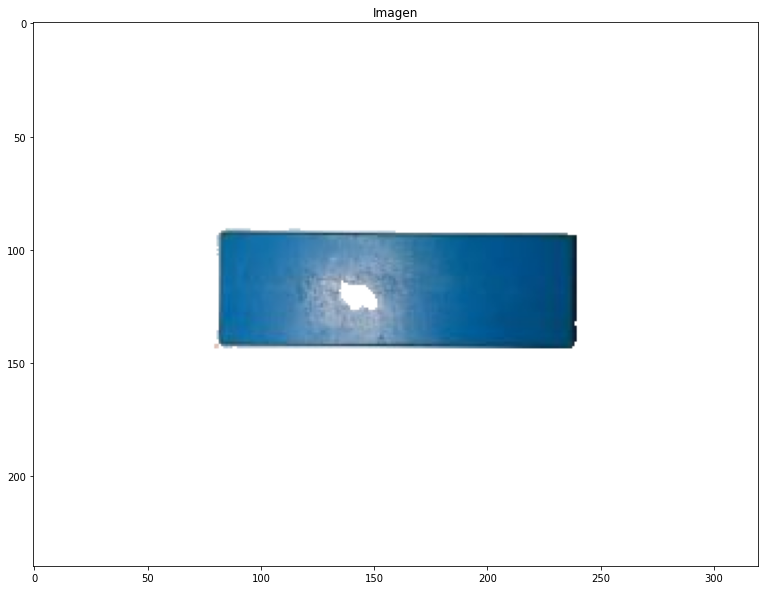

In [18]:
AZUL_argb= io.imread(path +r'\IMG_AZUL.jpeg')
AZUL_rgb= rgba2rgb(AZUL_argb)
AZUL = is_cromatic_v4(AZUL_rgb)
plt.figure(figsize=(15,10))
plt.imshow(AZUL)
plt.title("Imagen")
print(imagen_rgb[1][1])
plt.show()

Recorre, si encuentra que al menos un 10% de los pixeles de la imagen sus componentes r,g,b desvest es mayor a 10, es decir son cromaticos, entonces el objeto es cromatico, si recorre toda la imagen y encuentra menos del 10% no lo es

In [19]:
def is_cromatic_v5(image):
    rows,columns,pixel= image.shape
    pxl_sum = rows*columns
    clr_pxl = 0
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            desvest = np.std([r,g,b])
            if desvest > 10:
                clr_pxl += 1
            if clr_pxl >= 0.1*pxl_sum:
                return True
    return False

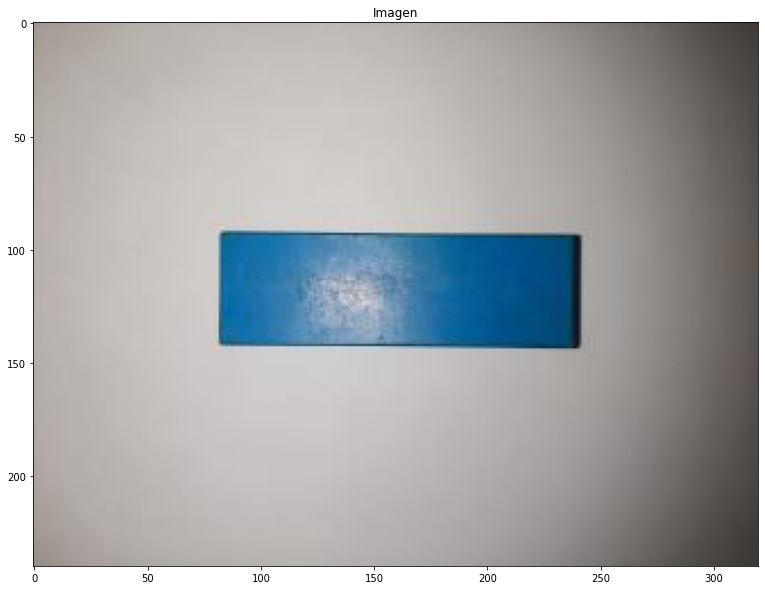

True

In [20]:
AZUL_argb= io.imread(path +r'\IMG_AZUL.jpeg')
plt.figure(figsize=(15,10))
plt.imshow(AZUL_argb)
plt.title("Imagen")
plt.show()
AZUL_rgb= rgba2rgb(AZUL_argb)
is_cromatic_v5(AZUL_rgb)

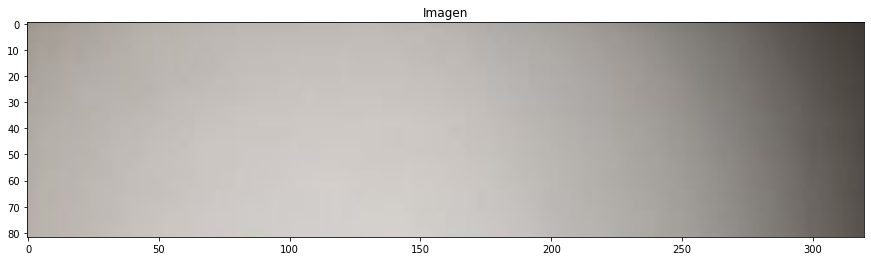

False

In [21]:
AZUL_SINOBJ_argb= io.imread(path +r'\IMG_AZUL_SINOBJ.jpeg')
plt.figure(figsize=(15,10))
plt.imshow(AZUL_SINOBJ_argb)
plt.title("Imagen")
plt.show()
AZUL_SINOBJ_rgb= rgba2rgb(AZUL_SINOBJ_argb)
is_cromatic_v5(AZUL_SINOBJ_rgb)

Funcion definitiva

In [22]:
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape
    if ch == 3:
        return rgba
    assert ch == 4, 'RGBA image has 4 channels.'
    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    a = np.asarray( a, dtype='float32' ) / 255.0
    R, G, B = background
    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B
    return np.asarray( rgb, dtype='uint8' )

def is_cromatic(image):
    image = rgba2rgb(image)
    rows,columns,pixel = image.shape
    pxl_sum = rows*columns
    clr_pxl = 0
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            desvest = np.std([r,g,b])
            if desvest > 10:
                clr_pxl += 1
            if clr_pxl >= 0.1*pxl_sum:
                return True
    return False

def binarize(image,thresh=0):
    if thresh==0:
        thresh = threshold_otsu(image)
    binary = image > thresh
    return binary

In [23]:
AZUL_SINOBJ_argb= io.imread(path +r'\IMG_AZUL_SINOBJ.jpeg')
AZUL_res_cromatic=is_cromatic_v5(AZUL_SINOBJ_argb)

# Deteccion de agujeros

In [24]:
def binarize(image,thresh=0):
    if thresh==0:
        thresh = threshold_otsu(image)
    binary = image > thresh
    return binary

Las imagenes se van a leer en escala de grises

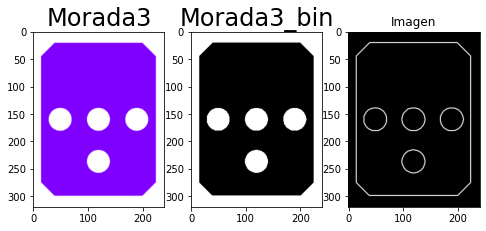

In [25]:
Morada3= io.imread(path +r'\Morada3.png')
Morada3_bin= binarize(io.imread(path +r'\Morada3.png',True))
Morada3_sobel = sobel(Morada3_bin)
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(8, 4))
ax0, ax1, ax2  = axes.flat
ax0.imshow(Morada3)
ax0.set_title('Morada3', fontsize=24)
ax1.imshow(Morada3_bin,cmap='gray')
ax1.set_title('Morada3_bin', fontsize=24)
ax2.imshow(Morada3_sobel,cmap='gray')
ax2.set_title('Morada3_sobel', fontsize=24)

plt.title("Imagen")
plt.show()

In [26]:
AZUL= io.imread(path +r'\IMG_AZUL.jpeg')
AZUL_bin= binarize(io.imread(path +r'\IMG_AZUL.jpeg',True))
AZUL_sobel = sobel(AZUL_bin)

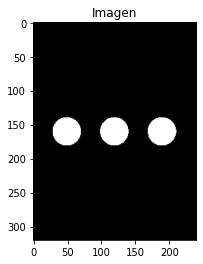

In [27]:
img = rgba2rgb(Morada3)
bin_img = Morada3_bin
h, w = bin_img.shape
#define la imagen de salida en 0
out_img = np.zeros(shape=(bin_img.shape), dtype=np.uint8)
# Select initial 3 A seed point
up = (50,150)
up_color = [255,0,0]

down = (125,150)
down_color = [0,255,0]

right = (180,150)
right_color = [0,0,255]

left = (347,165)

mid = (347,165)


seeds = [up, down, right]
#los pixeles de la imagen de saldia que representan las semillas se definen a un valor
for seed in seeds:
    x = seed[0]
    y = seed[1]
    out_img[y][x] = 255
#direcciones para a partir de la semilla hacer un cuadrado de la vecindad
directs = [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1),(-1,1),(-1,0)]
#imagen de pixeles visitados, inicia en cero
visited = np.zeros(shape=(bin_img.shape), dtype=np.uint8)
while len(seeds):
    seed = seeds.pop(0)
    x = seed[0]
    y = seed[1]
    # visit point (x,y)
    visited[y][x] = 1
    for direct in directs:
        cur_x = x + direct[0]
        cur_y = y + direct[1]
        # illegal 
        if cur_x <0 or cur_y<0 or cur_x >= w or cur_y >=h :
            continue
        # Not visited and belong to the same target 
        if (not visited[cur_y][cur_x]) and (bin_img[cur_y][cur_x]==bin_img[y][x]) :
            out_img[cur_y][cur_x] = 255
            visited[cur_y][cur_x] = 1
            seeds.append((cur_x,cur_y))
        '''
        bake_img = img.copy()
        h, w, l = bake_img.shape
        for i in range(h):
            for j in range(w):
                if out_img[i][j] != 255:
                    bake_img[i][j][0] = 0
                    bake_img[i][j][1] = 0
                    bake_img[i][j][2] = 0
        '''
plt.imshow(out_img, cmap = 'gray')
plt.title("Imagen")
plt.show()

In [28]:
#Creates rgb image all in 0
out_img = np.zeros(shape=(img.shape), dtype=np.uint8)
print(out_img[1])

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 

Pasa de imagen a binaria y a binaria pero en rgb es decir True = [255,255,255] y False = [0,0,0] NO SE NECESITA

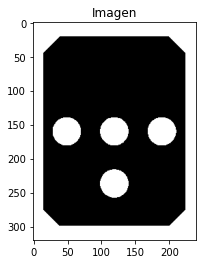

In [29]:
def bin2rgb(bin_image):
    y, x = bin_image.shape
    out_image = np.zeros(shape=(y,x,3), dtype=np.uint8)
    for i in range(y):
        for k in range(x):
            if bin_image[i][k] == True:
                out_image[i][k] = [255,255,255]
            else:
                out_image[i][k] = [0,0,0]
    return out_image


Morada3_bin= binarize(io.imread(path +r'\Morada3.png',True))
Morada3_bin_rgb = bin2rgb(Morada3_bin)
plt.imshow(Morada3_bin_rgb)
plt.title("Imagen")
plt.show()

{(50, 150): [255, 0, 0], (125, 150): [0, 255, 0], (180, 150): [0, 0, 255], (347, 165): [0, 0, 255]}


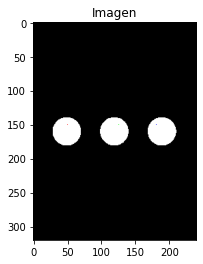

In [30]:
Morada3_bin= binarize(io.imread(path +r'\Morada3.png',True))
img = rgba2rgb(Morada3)
bin_img = Morada3_bin
h, w = bin_img.shape
#define la imagen de salida en 0
out_img = np.zeros(shape=(img.shape), dtype=np.uint8)
# Select initial 3 A seed point
up = (50,150)
up_color = [255,0,0]

down = (125,150)
down_color = [0,255,0]

right = (180,150)
right_color = [0,0,255]

left = (347,165)
left_color = [0,0,255]

mid = (347,165)
mid_color = [0,0,255]

seed_color = {up:up_color,down:down_color,right:right_color,left:left_color,mid:mid_color}
print (seed_color)

seeds = [up, down, right]
#los pixeles de la imagen de saldia que representan las semillas se definen a un valor
for seed in seeds:
    x = seed[0]
    y = seed[1]
    out_img[y][x] = seed_color[x,y]
#direcciones para a partir de la semilla hacer un cuadrado de la vecindad
directs = [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1),(-1,1),(-1,0)]
#imagen de pixeles visitados, inicia en cero
visited = np.zeros(shape=(bin_img.shape), dtype=np.uint8)
while len(seeds):
    seed = seeds.pop(0)
    x = seed[0]
    y = seed[1]
    # visit point (x,y)
    visited[y][x] = 1
    for direct in directs:
        cur_x = x + direct[0]
        cur_y = y + direct[1]
        # illegal 
        if cur_x <0 or cur_y<0 or cur_x >= w or cur_y >=h :
            continue
        # Not visited and belong to the same target 
        #Checks actual pixel
        if (not visited[cur_y][cur_x]) and (bin_img[cur_y][cur_x]==bin_img[y][x]) :
            out_img[cur_y][cur_x] = 255
            visited[cur_y][cur_x] = 1
            seeds.append((cur_x,cur_y))
        '''
        bake_img = img.copy()
        h, w, l = bake_img.shape
        for i in range(h):
            for j in range(w):
                if out_img[i][j] != 255:
                    bake_img[i][j][0] = 0
                    bake_img[i][j][1] = 0
                    bake_img[i][j][2] = 0
        '''
plt.imshow(out_img, cmap = 'gray')
plt.title("Imagen")
plt.show()

In [31]:
up = (50,150)
up_color = [255,0,0]

down = (125,150)
down_color = [0,255,0]

right = (180,150)
right_color = [0,0,255]

left = (347,165)
left_color = [0,0,255]

mid = (347,165)
mid_color = [0,0,255]

seed_color = {up:up_color,down:down_color,right:right_color,left:left_color,mid:mid_color}
print (seed_color)
x,y = down
out_img = seed_color[x,y]
print (out_img)

{(50, 150): [255, 0, 0], (125, 150): [0, 255, 0], (180, 150): [0, 0, 255], (347, 165): [0, 0, 255]}
[0, 255, 0]


Lee una foto y la binariza, la convierte a rgb pero la deja binaria y las seeds las colorea de un color escogido, falta que coloree cada vecidad

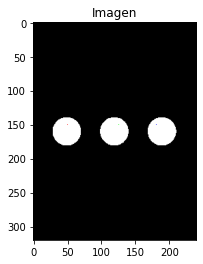

In [32]:
Morada3_bin= binarize(io.imread(path +r'\Morada3.png',True))
img = rgba2rgb(Morada3)
bin_img = Morada3_bin
h, w = bin_img.shape
img = bin2rgb(bin_img)

#define la imagen de salida en 0
out_img = np.zeros(shape=(img.shape), dtype=np.uint8)
# Select initial 3 A seed point
up = (50,150)
up_color = [255,0,0]

down = (125,150)
down_color = [0,255,0]

right = (180,150)
right_color = [0,0,255]

left = (347,165)
left_color = [0,0,255]

mid = (347,165)
mid_color = [0,0,255]

seed_color = {up:up_color,down:down_color,right:right_color,left:left_color,mid:mid_color}

seeds = [up, down, right]
#los pixeles de la imagen de saldia que representan las semillas se definen a un valor
for seed in seeds:
    x = seed[0]
    y = seed[1]
    out_img[y][x] = seed_color[x,y]
#direcciones para a partir de la semilla hacer un cuadrado de la vecindad
directs = [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1),(-1,1),(-1,0)]
#imagen de pixeles visitados, inicia en cero
visited = np.zeros(shape=(bin_img.shape), dtype=np.uint8)
while len(seeds):
    seed = seeds.pop(0)
    x = seed[0]
    y = seed[1]
    # visit point (x,y)
    visited[y][x] = 1
    for direct in directs:
        cur_x = x + direct[0]
        cur_y = y + direct[1]
        # illegal 
        if cur_x <0 or cur_y<0 or cur_x >= w or cur_y >=h :
            continue
        # Not visited and belong to the same target 
        #Checks actual pixel
        if (not visited[cur_y][cur_x]) and (bin_img[cur_y][cur_x]==bin_img[y][x]) :
            out_img[cur_y][cur_x] = 255
            visited[cur_y][cur_x] = 1
            seeds.append((cur_x,cur_y))
        '''
        bake_img = img.copy()
        h, w, l = bake_img.shape
        for i in range(h):
            for j in range(w):
                if out_img[i][j] != 255:
                    bake_img[i][j][0] = 0
                    bake_img[i][j][1] = 0
                    bake_img[i][j][2] = 0
        '''
plt.imshow(out_img, cmap = 'gray')
plt.title("Imagen")
plt.show()

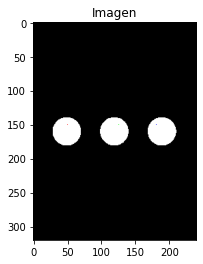

In [33]:
Morada3_bin= binarize(io.imread(path +r'\Morada3.png',True))


bin_img = Morada3_bin
img = bin2rgb(bin_img)

h, w = bin_img.shape

#define la imagen de salida en 0
out_img = np.zeros(shape=(img.shape), dtype=np.uint8)
# Select initial 3 A seed point
up = (50,150)
up_color = [255,0,0]

down = (125,150)
down_color = [0,255,0]

right = (180,150)
right_color = [0,0,255]

left = (347,165)
left_color = [0,0,255]

mid = (347,165)
mid_color = [0,0,255]

seed_dict = {up:up_color,down:down_color,right:right_color,left:left_color,mid:mid_color}

seeds = [up, down, right]
#los pixeles de la imagen de saldia que representan las semillas se definen a un valor
for seed in seeds:
    x = seed[0]
    y = seed[1]
    out_img[y][x] = seed_color[x,y]
#direcciones para a partir de la semilla hacer un cuadrado de la vecindad
directs = [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1),(-1,1),(-1,0)]
#imagen de pixeles visitados, inicia en cero
visited = np.zeros(shape=(bin_img.shape), dtype=np.uint8)
while len(seeds):
    seed = seeds.pop(0)
    x = seed[0]
    y = seed[1]
    # visit point (x,y)
    visited[y][x] = 1
    for direct in directs:
        cur_x = x + direct[0]
        cur_y = y + direct[1]
        # illegal 
        if cur_x <0 or cur_y<0 or cur_x >= w or cur_y >=h :
            continue
        # Not visited and belong to the same target 
        #Checks actual pixel
        if (not visited[cur_y][cur_x]) and (bin_img[cur_y][cur_x]==bin_img[y][x]) :
            out_img[cur_y][cur_x] = 255
            visited[cur_y][cur_x] = 1
            seeds.append((cur_x,cur_y))
        '''
        bake_img = img.copy()
        h, w, l = bake_img.shape
        for i in range(h):
            for j in range(w):
                if out_img[i][j] != 255:
                    bake_img[i][j][0] = 0
                    bake_img[i][j][1] = 0
                    bake_img[i][j][2] = 0
        '''
plt.imshow(out_img, cmap = 'gray')
plt.title("Imagen")
plt.show()

Modificar para que reciba semilla y color, se hace recursivo para que busque las 5 semillas

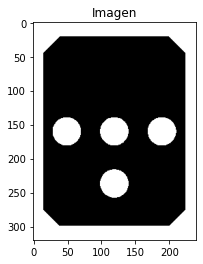

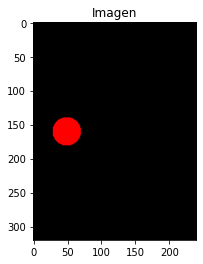

In [34]:
def seed_neighborhood(seed,seed_color,bin_img):
    img = bin2rgb(bin_img)
    
    out_img = np.zeros(shape=(img.shape), dtype=np.uint8)
    h, w = bin_img.shape
    seeds = [seed]
    #los pixeles de la imagen de saldia que representan las semillas se definen a un valor
    for seed in seeds:
        x = seed[0]
        y = seed[1]
        out_img[y][x] = seed_color
    #direcciones para a partir de la semilla hacer un cuadrado de la vecindad
    directs = [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1),(-1,1),(-1,0)]
    #imagen de pixeles visitados, inicia en cero
    visited = np.zeros(shape=(bin_img.shape), dtype=np.uint8)
    while len(seeds):
        seed = seeds.pop(0)
        x = seed[0]
        y = seed[1]
        # visit point (x,y)
        visited[y][x] = 1
        for direct in directs:
            cur_x = x + direct[0]
            cur_y = y + direct[1]
            # illegal 
            if cur_x <0 or cur_y<0 or cur_x >= w or cur_y >=h :
                continue
            # Not visited and belong to the same target 
            #Checks actual pixel
            if (not visited[cur_y][cur_x]) and (bin_img[cur_y][cur_x]==bin_img[y][x]) :
                out_img[cur_y][cur_x] = seed_color
                visited[cur_y][cur_x] = 1
                seeds.append((cur_x,cur_y))
    return out_img

Morada3_bin= binarize(io.imread(path +r'\Morada3.png',True))
plt.imshow(Morada3_bin,cmap='gray')
plt.title("Imagen")
plt.show()  

up = (50,150)
up_color = [255,0,0]

down = (125,150)
down_color = [0,255,0]

right = (180,150)
right_color = [0,0,255]

left = (347,165)
left_color = [255,0,255]

mid = (347,165)
mid_color = [125,0,125]

seed_colors = {up:up_color,down:down_color,right:right_color,left:left_color,mid:mid_color}

out_img = seed_neighborhood(up,seed_colors[up],Morada3_bin)
plt.imshow(out_img)
plt.title("Imagen")
plt.show()    
    

Marca el objeto al que toca con la semilla, sea o no un agujero por lo que debemos hacer que solo pinte agujeros

(320, 240)
(320, 240, 3)


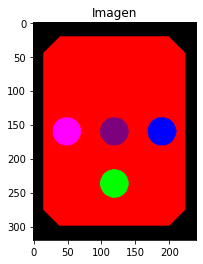

In [35]:
def seed_neighborhood(seed,seed_color,bin_img,out_img = np.zeros(shape=(320,240,3), dtype=np.uint8)):  
    #out_img = np.zeros(shape=(img.shape), dtype=np.uint8)
    h, w = bin_img.shape
    seeds = [seed]
    #los pixeles de la imagen de saldia que representan las semillas se definen a un valor
    for seed in seeds:
        x = seed[0]
        y = seed[1]
        out_img[y][x] = seed_color
    #direcciones para a partir de la semilla hacer un cuadrado de la vecindad
    directs = [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1),(-1,1),(-1,0)]
    #imagen de pixeles visitados, inicia en cero
    visited = np.zeros(shape=(bin_img.shape), dtype=np.uint8)
    while len(seeds):
        seed = seeds.pop(0)
        x = seed[0]
        y = seed[1]
        # visit point (x,y)
        visited[y][x] = 1
        for direct in directs:
            cur_x = x + direct[0]
            cur_y = y + direct[1]
            # illegal 
            if cur_x <0 or cur_y<0 or cur_x >= w or cur_y >=h :
                continue
            # Not visited and belong to the same target 
            #Checks actual pixel
            if (not visited[cur_y][cur_x]) and (bin_img[cur_y][cur_x]==bin_img[y][x]) :
                out_img[cur_y][cur_x] = seed_color
                visited[cur_y][cur_x] = 1
                seeds.append((cur_x,cur_y))
    return out_img

Morada3_bin= binarize(io.imread(path +r'\Morada3.png',True))
#out_img = np.zeros(shape=(img.shape), dtype=np.uint8)

up = (120,90)
up_color = [255,0,0]

down = (120,240)
down_color = [0,255,0]

right = (180,150)
right_color = [0,0,255]

left = (50,150)
left_color = [255,0,255]

mid = (125,150)
mid_color = [125,0,125]

seeds = [up,down,right,left,mid]
seed_colors = {up:up_color,down:down_color,right:right_color,left:left_color,mid:mid_color}
print(Morada3_bin.shape)
img = bin2rgb(bin_img)
print(img.shape)

out_img = seed_neighborhood(up,seed_colors[up],Morada3_bin)
out_img = seed_neighborhood(down,seed_colors[down],Morada3_bin,out_img)
out_img = seed_neighborhood(right,seed_colors[right],Morada3_bin,out_img)
out_img = seed_neighborhood(left,seed_colors[left],Morada3_bin,out_img)
out_img = seed_neighborhood(mid,seed_colors[mid],Morada3_bin,out_img)
plt.imshow(out_img)
plt.title("Imagen")
plt.show()

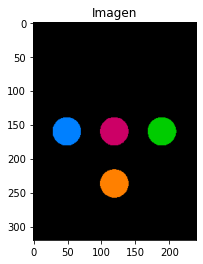

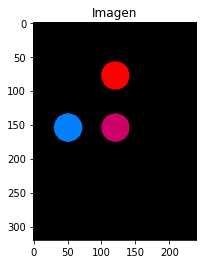

In [36]:
def seed_neighborhood(seed,seed_color,bin_img,out_img = np.zeros(shape=(320,240,3), dtype=np.uint8)):  
    #out_img = np.zeros(shape=(img.shape), dtype=np.uint8)
    h, w = bin_img.shape
    seeds = [seed]
    #los pixeles de la imagen de saldia que representan las semillas se definen a un valor
    for seed in seeds:
        x = seed[0]
        y = seed[1]
        #En caso de que en la imagen original el pixel que corresponde a la semilla es negro, es decir
        #no es un agujero, no lo pinta, sino que se sale
        if bin_img[y][x] != True:
            return out_img
        out_img[y][x] = seed_color
    #direcciones para a partir de la semilla hacer un cuadrado de la vecindad
    directs = [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1),(-1,1),(-1,0)]
    #imagen de pixeles visitados, inicia en cero
    visited = np.zeros(shape=(bin_img.shape), dtype=np.uint8)
    while len(seeds):
        seed = seeds.pop(0)
        x = seed[0]
        y = seed[1]
        # visit point (x,y)
        visited[y][x] = 1
        for direct in directs:
            cur_x = x + direct[0]
            cur_y = y + direct[1]
            # illegal 
            if cur_x <0 or cur_y<0 or cur_x >= w or cur_y >=h :
                continue
            # Not visited and belong to the same target 
            #Checks actual pixel
            if (not visited[cur_y][cur_x]) and (bin_img[cur_y][cur_x]==bin_img[y][x]) :
                out_img[cur_y][cur_x] = seed_color
                visited[cur_y][cur_x] = 1
                seeds.append((cur_x,cur_y))
    return out_img

Morada3_bin= binarize(io.imread(path +r'\Morada3.png',True))


up = (120,90)
up_color = [255,0,0]

down = (120,240)
down_color = [255,128,0]

right = (180,150)
right_color = [0,204,0]

left = (50,150)
left_color = [0,128,255]

mid = (125,150)
mid_color = [204,0,102]

seeds = [up,down,right,left,mid]
seed_colors = {up:up_color,down:down_color,right:right_color,left:left_color,mid:mid_color}

out_img = seed_neighborhood(up,seed_colors[up],Morada3_bin)
out_img = seed_neighborhood(down,seed_colors[down],Morada3_bin,out_img)
out_img = seed_neighborhood(right,seed_colors[right],Morada3_bin,out_img)
out_img = seed_neighborhood(left,seed_colors[left],Morada3_bin,out_img)
out_img = seed_neighborhood(mid,seed_colors[mid],Morada3_bin,out_img)
plt.imshow(out_img)
plt.title("Imagen")
plt.show()

Morada3_bin= binarize(io.imread(path +r'\Gris3.png',True))
out_img = np.zeros(shape=(320,240,3), dtype=np.uint8)
out_img = seed_neighborhood(up,seed_colors[up],Morada3_bin,out_img)
out_img = seed_neighborhood(down,seed_colors[down],Morada3_bin,out_img)
out_img = seed_neighborhood(right,seed_colors[right],Morada3_bin,out_img)
out_img = seed_neighborhood(left,seed_colors[left],Morada3_bin,out_img)
out_img = seed_neighborhood(mid,seed_colors[mid],Morada3_bin,out_img)
plt.imshow(out_img)
plt.title("Imagen")
plt.show()

In [37]:
def agujeros(image, seed_colors):
    up_pxl = 0
    down_pxl = 0
    right_pxl = 0
    left_pxl = 0
    mid_pxl = 0
    res = []
    y, x, l = image.shape
    for i in range(y):
        for k in range(x):
            if np.array_equal(image[i][k],seed_colors['up']):
                up_pxl += 1
            elif np.array_equal(image[i][k],seed_colors['down']):
                down_pxl += 1
            elif np.array_equal(image[i][k],seed_colors['right']):
                right_pxl += 1
            elif np.array_equal(image[i][k],seed_colors['left']):
                left_pxl += 1
            elif np.array_equal(image[i][k],seed_colors['mid']):
                mid_pxl += 1
    res = [up_pxl, down_pxl, right_pxl, left_pxl, mid_pxl]
    res_agujeros = [False,False,False,False,False]
    if res[0]>=100:
        res_agujeros[0] = True
    if res[1]>=100:
        res_agujeros[1] = True
    if res[2]>=100:
        res_agujeros[2] = True
    if res[3]>=100:
        res_agujeros[3] = True
    if res[4]>=100:
        res_agujeros[4] = True
    return res_agujeros
    

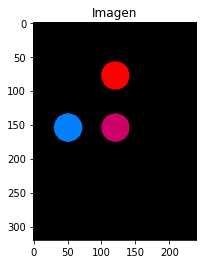

[True, False, False, True, True]


In [38]:
up = (120,90)
up_color = [255,0,0]

down = (120,240)
down_color = [255,128,0]

right = (180,150)
right_color = [0,204,0]

left = (50,150)
left_color = [0,128,255]

mid = (125,150)
mid_color = [204,0,102]

seed_colors = {'up':up_color,'down':down_color,'right':right_color,'left':left_color,'mid':mid_color}

Morada3_bin= binarize(io.imread(path +r'\Gris3.png',True))
out_img = np.zeros(shape=(320,240,3), dtype=np.uint8)
out_img = seed_neighborhood(up,seed_colors['up'],Morada3_bin,out_img)
out_img = seed_neighborhood(down,seed_colors['down'],Morada3_bin,out_img)
out_img = seed_neighborhood(right,seed_colors['right'],Morada3_bin,out_img)
out_img = seed_neighborhood(left,seed_colors['left'],Morada3_bin,out_img)
out_img = seed_neighborhood(mid,seed_colors['mid'],Morada3_bin,out_img)
plt.imshow(out_img)
plt.title("Imagen")
plt.show()

res_agujeros = agujeros(out_img,seed_colors)
print(res_agujeros)

In [39]:
def res_report(res_cromatic,res_agujeros):
    #Resultado cromatico
    cromatic_report = 'El objeto es no cromatico y '
    if res_cromatic == True:
        cromatic_report = 'El objeto es cromatico y '
    #Resultado de los agujeros
    agujeros_report = 'se encontraron agujeros en las siguientes posiciones: \n'
    if np.array_equal(res_agujeros,[False,False,False,False,False]):
        agujeros_report = 'no se encontraron agujeros.'
    if res_agujeros[0]:
        agujeros_report = agujeros_report + '   -Superior\n'
    if res_agujeros[1]:
        agujeros_report = agujeros_report + '   -Inferior\n'
    if res_agujeros[2]:
        agujeros_report = agujeros_report + '   -Lateral derecho\n'
    if res_agujeros[3]:
        agujeros_report = agujeros_report + '   -Lateral izquierdo\n'
    if res_agujeros[4]:
        agujeros_report = agujeros_report + '   -Central\n'
    report = cromatic_report + agujeros_report
    print (report)

In [40]:
res_report(1,res_agujeros)

El objeto es cromatico y se encontraron agujeros en las siguientes posiciones: 
   -Superior
   -Lateral izquierdo
   -Central



In [41]:
Gris3= io.imread(path +r'\Gris3.png')
Gris3_bin= binarize(io.imread(path +r'\Gris3.png',True))
res_cromatic = is_cromatic(Gris3)

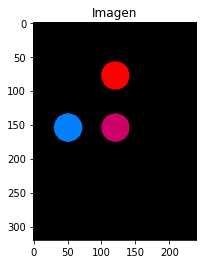

In [42]:
out_img = np.zeros(shape=(320,240,3), dtype=np.uint8)
out_img = seed_neighborhood(up,seed_colors['up'],Gris3_bin,out_img)
out_img = seed_neighborhood(down,seed_colors['down'],Gris3_bin,out_img)
out_img = seed_neighborhood(right,seed_colors['right'],Gris3_bin,out_img)
out_img = seed_neighborhood(left,seed_colors['left'],Gris3_bin,out_img)
out_img = seed_neighborhood(mid,seed_colors['mid'],Gris3_bin,out_img)
plt.imshow(out_img)
plt.title("Imagen")
plt.show()

res_agujeros = agujeros(out_img,seed_colors)

In [43]:
res_report(res_agujeros,res_agujeros)

El objeto es no cromatico y se encontraron agujeros en las siguientes posiciones: 
   -Superior
   -Lateral izquierdo
   -Central



# Funciones finales, supuestamente jeje

In [3]:
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape
    if ch == 3:
        return rgba
    assert ch == 4, 'RGBA image has 4 channels.'
    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    a = np.asarray( a, dtype='float32' ) / 255.0
    R, G, B = background
    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B
    return np.asarray( rgb, dtype='uint8' )

In [4]:
def is_cromatic(image):
    image = rgba2rgb(image)
    rows,columns,pixel = image.shape
    pxl_sum = rows*columns
    clr_pxl = 0
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            desvest = np.std([r,g,b])
            if desvest > 10:
                clr_pxl += 1
            if clr_pxl >= 0.1*pxl_sum:
                return True
    return False

In [5]:
def binarize(image,thresh=0):
    if thresh==0:
        thresh = threshold_otsu(image)
    binary = image > thresh
    return binary

In [6]:
def region_growth(seed,seed_color,bin_img,out_img = np.zeros(shape=(320,240,3), dtype=np.uint8)):  
    #out_img = np.zeros(shape=(img.shape), dtype=np.uint8)
    h, w = bin_img.shape
    seeds = [seed]
    #los pixeles de la imagen de saldia que representan las semillas se definen a un valor
    for seed in seeds:
        x = seed[0]
        y = seed[1]
        #En caso de que en la imagen original el pixel que corresponde a la semilla es negro, es decir
        #no es un agujero, no lo pinta, sino que se sale
        if bin_img[y][x] != True:
            return out_img
        out_img[y][x] = seed_color
    #direcciones para a partir de la semilla hacer un cuadrado de la vecindad
    directs = [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1),(-1,1),(-1,0)]
    #imagen de pixeles visitados, inicia en cero
    visited = np.zeros(shape=(bin_img.shape), dtype=np.uint8)
    while len(seeds):
        seed = seeds.pop(0)
        x = seed[0]
        y = seed[1]
        # visit point (x,y)
        visited[y][x] = 1
        for direct in directs:
            cur_x = x + direct[0]
            cur_y = y + direct[1]
            # illegal 
            if cur_x <0 or cur_y<0 or cur_x >= w or cur_y >=h :
                continue
            # Not visited and belong to the same target 
            #Checks actual pixel
            if (not visited[cur_y][cur_x]) and (bin_img[cur_y][cur_x]==bin_img[y][x]) :
                out_img[cur_y][cur_x] = seed_color
                visited[cur_y][cur_x] = 1
                seeds.append((cur_x,cur_y))
    return out_img

In [10]:
def agujeros(image, seed_colors):
    up_pxl = 0
    down_pxl = 0
    right_pxl = 0
    left_pxl = 0
    mid_pxl = 0
    res = []
    y, x, l = image.shape
    for i in range(y):
        for k in range(x):
            if np.array_equal(image[i][k],seed_colors['up']):
                up_pxl += 1
            elif np.array_equal(image[i][k],seed_colors['down']):
                down_pxl += 1
            elif np.array_equal(image[i][k],seed_colors['right']):
                right_pxl += 1
            elif np.array_equal(image[i][k],seed_colors['left']):
                left_pxl += 1
            elif np.array_equal(image[i][k],seed_colors['mid']):
                mid_pxl += 1
    res = [up_pxl, down_pxl, right_pxl, left_pxl, mid_pxl]
    res_agujeros = [False,False,False,False,False]
    if res[0]>=100:
        res_agujeros[0] = True
    if res[1]>=100:
        res_agujeros[1] = True
    if res[2]>=100:
        res_agujeros[2] = True
    if res[3]>=100:
        res_agujeros[3] = True
    if res[4]>=100:
        res_agujeros[4] = True
    return res_agujeros

In [11]:
def segmentacion_agujeros(bin_image):
    #Definicion de semillas
    up = (120,90)
    down = (120,240)
    right = (180,150)  
    left = (50,150)
    mid = (125,150)
    #Definicion de colores para cada agujero
    up_color = [255,0,0]
    down_color = [255,128,0]
    right_color = [0,204,0]
    left_color = [0,128,255]
    mid_color = [204,0,102]
    seed_colors = {'up':up_color,'down':down_color,'right':right_color,'left':left_color,'mid':mid_color}
    #Se define la imagend de salida donde se guardaran los agujeros encontrados
    out_img = np.zeros(shape=(320,240,3), dtype=np.uint8)
    #Se realiza el crecimiento de regiones
    out_img = region_growth(up,seed_colors['up'],bin_image,out_img)
    out_img = region_growth(down,seed_colors['down'],bin_image,out_img)
    out_img = region_growth(right,seed_colors['right'],bin_image,out_img)
    out_img = region_growth(left,seed_colors['left'],bin_image,out_img)
    out_img = region_growth(mid,seed_colors['mid'],bin_image,out_img)
    res_agujeros = agujeros(out_img,seed_colors)
    plt.imshow(out_img)
    plt.title("Imagen")
    plt.show()
    return res_agujeros

In [12]:
def res_report(res_cromatic,res_agujeros):
    #Resultado cromatico
    cromatic_report = 'El objeto es no cromatico y '
    if res_cromatic == True:
            cromatic_report = 'El objeto es cromatico y '
    #Resultado de los agujeros
    agujeros_report = 'se encontraron agujeros en las siguientes posiciones: \n'
    if np.array_equal(res_agujeros,[False,False,False,False,False]):
        agujeros_report = 'no se encontraron agujeros.'
    if res_agujeros[0]:
        agujeros_report = agujeros_report + '   -Superior\n'
    if res_agujeros[1]:
        agujeros_report = agujeros_report + '   -Inferior\n'
    if res_agujeros[2]:
        agujeros_report = agujeros_report + '   -Lateral derecho\n'
    if res_agujeros[3]:
        agujeros_report = agujeros_report + '   -Lateral izquierdo\n'
    if res_agujeros[4]:
        agujeros_report = agujeros_report + '   -Central'
    report = cromatic_report + agujeros_report
    print (report)

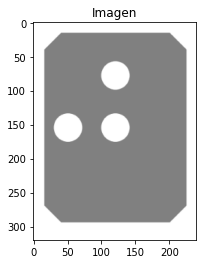

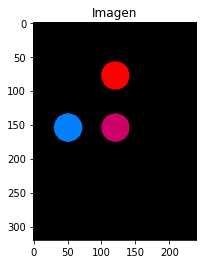

El objeto es no cromatico y se encontraron agujeros en las siguientes posiciones: 
   -Superior
   -Lateral izquierdo
   -Central


In [13]:
Gris3= io.imread(path +r'\Gris3.png')
Gris3_bin= binarize(io.imread(path +r'\Gris3.png',True))
plt.imshow(Gris3)
plt.title("Imagen")
plt.show()
res_cromatic = is_cromatic(Gris3)
res_agujeros = segmentacion_agujeros(Gris3_bin)
res_report(res_cromatic,res_agujeros)

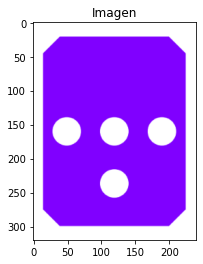

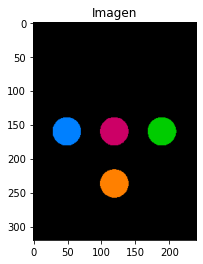

El objeto es cromatico y se encontraron agujeros en las siguientes posiciones: 
   -Inferior
   -Lateral derecho
   -Lateral izquierdo
   -Central


In [14]:
Gris3= io.imread(path +r'\Morada3.png')
Gris3_bin= binarize(io.imread(path +r'\Morada3.png',True))
plt.imshow(Gris3)
plt.title("Imagen")
plt.show()
res_cromatic = is_cromatic(Gris3)
res_agujeros = segmentacion_agujeros(Gris3_bin)
res_report(res_cromatic,res_agujeros)

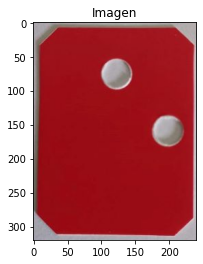

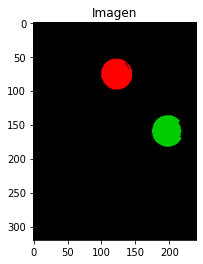

El objeto es cromatico y se encontraron agujeros en las siguientes posiciones: 
   -Superior
   -Lateral derecho



In [15]:
Rojo2Foto= io.imread(path +r'\Rojo2Foto.jpeg')
Rojo2Foto_bin= binarize(io.imread(path +r'\Rojo2Foto.jpeg',True))
plt.imshow(Rojo2Foto)
plt.title("Imagen")
plt.show()
res_cromatic = is_cromatic(Rojo2Foto)
res_agujeros = segmentacion_agujeros(Rojo2Foto_bin)
res_report(res_cromatic,res_agujeros)

# Recortar y escalar la imagen

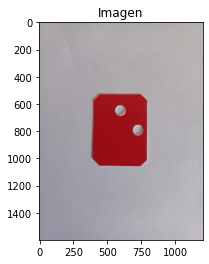

In [21]:
Rojo2FotoOg= io.imread(path +r'\Rojo2FotoOg.jpeg')
Rojo2FotoOg_bin= binarize(io.imread(path +r'\Rojo2FotoOg.jpeg',True))
plt.imshow(Rojo2FotoOg)
plt.title("Imagen")
plt.show()

1600 1200 3
533 400


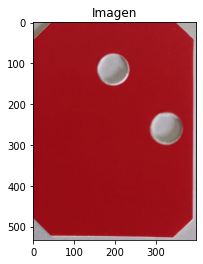

In [54]:
y,x,l = Rojo2FotoOg.shape
print(y,x,l)
y_div = y//3
x_div = x//3
print(y_div,x_div)
Rojo2FotoOgCut = Rojo2FotoOg[y_div:2*y_div,x_div:2*x_div]
plt.imshow(Rojo2FotoOgCut)
plt.title("Imagen")
plt.show()

Recorta las imagenes para tomar el centro de la regla de los tercios, debe indicar si es en escala de grises con un True de segundo argumento o nada si es rgb

In [57]:
def crop_image(image,gray=False):
    if gray == True:
        y,x = image.shape
    else:
        y,x,l = image.shape
    y_div = y//3
    x_div = x//3
    cropped = image[y_div:2*y_div,x_div:2*x_div]
    plt.imshow(cropped)
    plt.show()
    return cropped

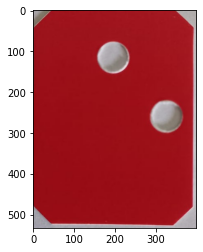

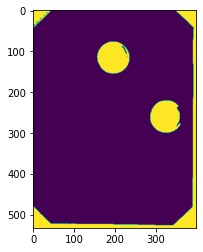

In [58]:
Rojo2Foto_cropped = crop_image(Rojo2FotoOg)
Rojo2Foto_bin_cropped = crop_image(Rojo2FotoOg_bin,True)

320 240


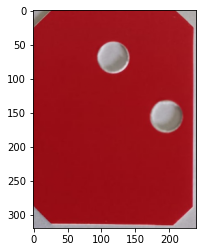

In [64]:
Rojo2Foto_cropped_rezised = resize(Rojo2Foto_cropped,(320,240))
y,x,l = Rojo2Foto_cropped_rezised.shape
print (y,x)
plt.imshow(Rojo2Foto_cropped_rezised)
plt.show()

Recorta y escala la imagen a 320 x 240

In [93]:
def edit_image(image,gray=False):
    print (image[50][50])
    if gray == True:
        y,x = image.shape
    else:
        y,x,l = image.shape
    y_div = y//3
    x_div = x//3
    cropped = image[y_div:2*y_div,x_div:2*x_div]
    print (cropped[50][50])
    resized = resize(cropped,(320,240),preserve_range=True).astype(int)
    print(resized[50][50])
    plt.imshow(cropped)
    plt.show()
    return resized

[172 168 169]
[158  21  29]
[158  18  27]


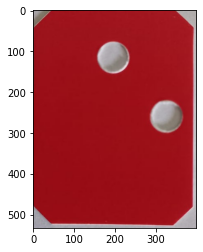

True
False
0


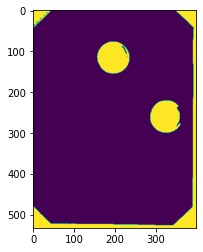

In [94]:
Rojo2Foto_edited = edit_image(Rojo2FotoOg)
Rojo2Foto_bin_edited = edit_image(Rojo2FotoOg_bin,True)

In [95]:
def edit_image(image,gray=False):
    if gray == True:
        y,x = image.shape
    else:
        y,x,l = image.shape
    y_div = y//3
    x_div = x//3
    cropped = image[y_div:2*y_div,x_div:2*x_div]
    resized = resize(cropped,(320,240),preserve_range=True).astype(int)
    return resized

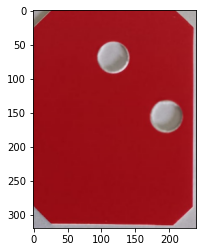

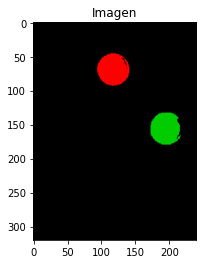

El objeto es cromatico y se encontraron agujeros en las siguientes posiciones: 
   -Superior
   -Lateral derecho



In [96]:
Rojo2Foto= edit_image(io.imread(path +r'\Rojo2FotoOg.jpeg'))
Rojo2Foto_bin= edit_image(binarize(io.imread(path +r'\Rojo2FotoOg.jpeg',True)),True)
plt.imshow(Rojo2Foto)
plt.show()
res_cromatic = is_cromatic(Rojo2Foto)
res_agujeros = segmentacion_agujeros(Rojo2Foto_bin)
res_report(res_cromatic,res_agujeros)

Falla is cromatic para la foto recortada y escalada

In [70]:
is_cromatic(Rojo2Foto)

False

In [ ]:
def is_cromatic_tst(image):
    image = rgba2rgb(image)
    plt.imshow(image)
    plt.show()
    rows,columns,pixel = image.shape
    print(rows,columns)
    pxl_sum = rows*columns
    color_pxl = 0
    for row in range(rows):
        for column in range(columns):
            r = image[row][column][0]
            g = image[row][column][1]
            b = image[row][column][2]
            desvest = np.std([r,g,b])
            print(desvest)
            if desvest > 10:
                color_pxl += 1
    print (color_pxl)
    if color_pxl >= 0.1*pxl_sum:
        return True
    else:
        return False

is_cromatic_tst(Rojo2Foto)

In [81]:
print(Rojo2Foto[40][40])
print(io.imread(path +r'\Rojo2FotoOg.jpeg')[40][40])

[0.61196863 0.07471373 0.10608628]
[173 167 169]
